# Tensor Tutorial

This is basic tutorial for pytorch and derives most of its componets from [pytorch](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py) website and [Deep Learning for Computer Vision](https://web.eecs.umich.edu/~justincj/teaching/eecs498/FA2020/) course in University of Michigan. This tutorial will include the following:

- [Tensor Basics](#Tensor-Basics)
- [Tensor Operations](#Tensor-Operations)
- [Reshaping Operations](#Reshaping-Operations)
- [Tensor Indexing](#Tensor-Indexing)
- [Running On GPU](#Running-on-GPU)
- [NumPy Bridge](#NumPy-Bridge)

<a id=’section_1’></a>
### Section 1

In [1]:
%matplotlib inline


### What is PyTorch?

Pytorch is an open source machine learning framework. It is a python based scientific computing package and it provides a few key features:

- A multidimensional Tensor object, similar to numpy but with GPU accelleration.
- An optimized autograd engine for automatically computing derivatives
- A clean, modular API for building and deploying deep learning models

### Import Torch


To use PyTorch, we first need to import the torch package. We also check the version of Pytorch

In [4]:
#from __future__ import print_function
import torch

print(torch.__version__)

1.6.0


## Tensor Basics

### Creating and Accessing tensors

A torch tensor is a multidimensional grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the tensor; the shape of a tensor is a tuple of integers giving the size of the array along each dimension.

We can initialize torch tensor from nested Python lists. We can access or mutate elements of a PyTorch tensor using square brackets.

Accessing an element from a PyTorch tensor returns a PyTorch scalar; we can convert this to a Python scalar using the .item() method:

Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

#### Construct Tensor

Construct a 5x3 matrix, uninitialized:



In [5]:
x = torch.empty(5, 3)
print(x)

tensor([[1.1210e-44, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 2.8026e-45]])


__Note:__ An uninitialized matrix is declared, but does not contain definite known values before it is used. When an
uninitialized matrix is created,whatever values were in the allocated memory at the time will appear as the initial values.

Construct a randomly initialized matrix:



In [6]:
x = torch.rand(5, 3)
print(x)

tensor([[0.3152, 0.0765, 0.2849],
        [0.6353, 0.7137, 0.6243],
        [0.1114, 0.7594, 0.5803],
        [0.6653, 0.1375, 0.4269],
        [0.0938, 0.4565, 0.9148]])


Construct a matrix filled zeros and of dtype long:



In [7]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Construct a 1-D tensor from a list

In [158]:
# Create a rank 1 tensor from a Python list
x = torch.tensor([5, 3, 2])
print(x)

a = torch.tensor([i for i in range(5)])
print(a)

tensor([5, 3, 2])
tensor([0, 1, 2, 3, 4])


In [34]:
type(x)

torch.Tensor

In [35]:
x.dim()

1

In [36]:
x.shape

torch.Size([3])

In [37]:
x.type()

'torch.LongTensor'

In [38]:
x.dtype

torch.int64

Construct a 2-D tensor from a list

In [162]:
# Create a two-dimensional tensor
b = torch.tensor([[1, 2, 3], [4, 5, 5]])
print(b)

tensor([[1, 2, 3],
        [4, 5, 5]])


In [163]:
type(b)

torch.Tensor

In [164]:
b.shape

torch.Size([2, 3])

In [165]:
b.dim()

2

Construct a tensor based on an existing tensor. These methods
will reuse properties of the input tensor, e.g. dtype, unless
new values are provided by user



In [14]:
y = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

y = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[ 1.3577, -2.3322,  0.2029],
        [-1.7668,  1.5727,  0.4143],
        [-1.0798,  0.0425, -0.6787],
        [ 1.1113,  1.5021,  0.8525],
        [-0.7586, -1.9107, -0.2408]])
tensor([[ 1.3577, -2.3322,  0.2029],
        [-1.7668,  1.5727,  0.4143],
        [-1.0798,  0.0425, -0.6787],
        [ 1.1113,  1.5021,  0.8525],
        [-0.7586, -1.9107, -0.2408]])


In [19]:
print(y.size())
print(y.shape)

torch.Size([5, 3])
torch.Size([5, 3])


__Note__: torch.Size is in fact a tuple, so it supports all tuple operations.

Construct a tensor based on an existing tensor. 

These methods will reuse properties of the input tensor, e.g. dtype, unless new values are provided by user

In [81]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)  

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.9670,  0.7925,  0.5505],
        [-0.8527,  0.8426, -2.3188],
        [ 1.2546, -1.2219, -0.4760],
        [-1.1880,  1.0934, -0.3933],
        [ 0.7037, -1.2517, -0.5332]])


Construct a torch.FloatTensor using FloatTensor() method¶

In [69]:
a = torch.tensor([1.0,2.0,3.0,4.0,5.0])

In [70]:
a.type()

'torch.FloatTensor'

In [71]:
a = torch.FloatTensor([1,2,3,4,5])

In [72]:
a.type()

'torch.FloatTensor'

Convert from a LongTensor using type method¶

In [73]:
b = torch.tensor([i for i in range(5)])

In [74]:
b

tensor([0, 1, 2, 3, 4])

In [75]:
b.dtype

torch.int64

In [76]:
b.type()

'torch.LongTensor'

In [77]:
b = b.type(torch.FloatTensor)

In [78]:
b

tensor([0., 1., 2., 3., 4.])

In [79]:
b.dtype

torch.float32

In [80]:
b.type()

'torch.FloatTensor'

#### Access elements from Tensor

Access elements from 1-D tensors

In [42]:
print('a[0]: ', a[2])
print('type(a[0]): ', type(a[0]))

a[0]:  tensor(2)
type(a[0]):  <class 'torch.Tensor'>


In [30]:
a[2]

tensor(2)

In [29]:
type(a[0])

torch.Tensor

Access elements from 2-D tensors

In [44]:
# Access elements from a multidimensional tensor
print('b[0, 1]:', b[0, 1])
print('b[1, 2]:', b[1, 2])

b[0, 1]: tensor(2)
b[1, 2]: tensor(5)


In [45]:
b.dim()

2

In [46]:
b.shape

torch.Size([2, 3])

#### Access element from Tensor using .item() method

If you have a one element tensor, use .item() to get the value as a Python number

In [31]:
a[2].item()

2

In [32]:
type(a[2].item())

int

In [48]:
b[0,1].item()

2

#### Mutate elements of a Tensor

Mutate elements of a 1-D Tensor

In [49]:
a[1] = 10
print('a after mutating:')
print(a)

a after mutating:
tensor([ 0, 10,  2,  3,  4])


Mutate elements of a multidimensional tensor

In [50]:
b[1, 1] = 100
print('b after mutating:')
print(b)

b after mutating:
tensor([[  1,   2,   3],
        [  4, 100,   5]])


## Tensor Operations
So far we have seen how to construct, access, and reshape tensors. But one of the most important reasons to use tensors is for performing computation! PyTorch provides many different operations to perform computations on tensors.

### Elementwise operations

Basic mathematical functions operate elementwise on tensors, and are available as operator overloads, as functions in the `torch` module, and as instance methods on torch objects; all produce the same results:

In [116]:
x = torch.tensor([[1, 2, 3, 4]], dtype=torch.float32)
y = torch.tensor([[5, 6, 7, 8]], dtype=torch.float32)

# Elementwise sum; all give the same result
print('Elementwise sum:')
print(x + y)
print(torch.add(x, y))
print(x.add(y))

# Elementwise difference
print('\nElementwise difference:')
print(x - y)
print(torch.sub(x, y))
print(x.sub(y))

# Elementwise product
print('\nElementwise product:')
print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

# Elementwise division
print('\nElementwise division')
print(x / y)
print(torch.div(x, y))
print(x.div(y))

# Elementwise power
print('\nElementwise power')
print(x ** y)
print(torch.pow(x, y))
print(x.pow(y))

Elementwise sum:
tensor([[ 6.,  8., 10., 12.]])
tensor([[ 6.,  8., 10., 12.]])
tensor([[ 6.,  8., 10., 12.]])

Elementwise difference:
tensor([[-4., -4., -4., -4.]])
tensor([[-4., -4., -4., -4.]])
tensor([[-4., -4., -4., -4.]])

Elementwise product:
tensor([[ 5., 12., 21., 32.]])
tensor([[ 5., 12., 21., 32.]])
tensor([[ 5., 12., 21., 32.]])

Elementwise division
tensor([[0.2000, 0.3333, 0.4286, 0.5000]])
tensor([[0.2000, 0.3333, 0.4286, 0.5000]])
tensor([[0.2000, 0.3333, 0.4286, 0.5000]])

Elementwise power
tensor([[1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04]])
tensor([[1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04]])
tensor([[1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04]])


Torch also provides many standard mathematical functions; these are available both as functions in the `torch` module and as instance methods on tensors:

You can find a full list of all available mathematical functions [in the documentation](https://pytorch.org/docs/stable/torch.html#pointwise-ops); many functions in the `torch` module have corresponding instance methods [on tensor objects](https://pytorch.org/docs/stable/tensors.html).

In [117]:
x = torch.tensor([[1, 2, 3, 4]], dtype=torch.float32)

print('Square root:')
print(torch.sqrt(x))
print(x.sqrt())

print('\nTrig functions:')
print(torch.sin(x))
print(x.sin())
print(torch.cos(x))
print(x.cos())

Square root:
tensor([[1.0000, 1.4142, 1.7321, 2.0000]])
tensor([[1.0000, 1.4142, 1.7321, 2.0000]])

Trig functions:
tensor([[ 0.8415,  0.9093,  0.1411, -0.7568]])
tensor([[ 0.8415,  0.9093,  0.1411, -0.7568]])
tensor([[ 0.5403, -0.4161, -0.9900, -0.6536]])
tensor([[ 0.5403, -0.4161, -0.9900, -0.6536]])


### Addition Operation

There are multiple syntaxes for operations. In the following example, we will take a look at the addition operation.

#### Addition: syntax 1

In [82]:
y = torch.rand(5, 3)
print(x + y)

tensor([[ 1.5617,  1.7276,  1.3969],
        [-0.7411,  1.3718, -1.5476],
        [ 1.3845, -0.3287,  0.1898],
        [-0.4303,  1.8875,  0.3250],
        [ 1.2277, -0.7598,  0.3443]])


#### Addition: syntax 2

In [83]:
print(torch.add(x, y))

tensor([[ 1.5617,  1.7276,  1.3969],
        [-0.7411,  1.3718, -1.5476],
        [ 1.3845, -0.3287,  0.1898],
        [-0.4303,  1.8875,  0.3250],
        [ 1.2277, -0.7598,  0.3443]])


#### Addition: syntax 3 (providing an output tensor as argument)

In [144]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[[ 0.0510, -0.2032, -0.6519,  ...,  0.3475,  2.0880,  0.7289],
         [ 2.8761,  1.3956,  0.5649,  ...,  0.7191,  1.8040, -0.1888],
         [ 0.2670,  0.1864,  1.5474,  ...,  3.1230, -1.7720, -0.9341],
         ...,
         [ 1.2453,  0.1710,  1.4231,  ..., -1.5653,  1.3843,  1.6015],
         [ 1.2853, -1.1542,  0.3315,  ...,  2.1203, -1.6391, -1.5866],
         [-1.3938, -1.8717, -0.6157,  ..., -1.6583,  1.0209, -5.1936]],

        [[ 0.0951, -0.1366, -1.0436,  ...,  1.0917, -0.9968,  0.4602],
         [ 3.0840,  0.7693,  1.3153,  ...,  0.3284,  0.5721,  0.2719],
         [ 0.9788, -0.1160, -1.4446,  ...,  1.1257, -1.4598, -1.8068],
         ...,
         [-1.3934,  3.4338,  0.3304,  ...,  0.6527, -1.1372, -0.3326],
         [ 0.4326,  2.2077, -0.7402,  ..., -0.5027,  0.5887, -1.6103],
         [-0.4017,  0.6237,  1.1180,  ..., -0.3035, -1.5818,  0.5417]],

        [[ 0.4402, -1.6298, -3.5025,  ..., -0.5262,  2.4297, -1.8964],
         [ 0.4091, -3.7474,  3.0208,  ...,  2

##### Addition: syntax 4 (in-place)

In [145]:
# adds x to y
y.add_(x)
print(y)

tensor([[[ 0.0510, -0.2032, -0.6519,  ...,  0.3475,  2.0880,  0.7289],
         [ 2.8761,  1.3956,  0.5649,  ...,  0.7191,  1.8040, -0.1888],
         [ 0.2670,  0.1864,  1.5474,  ...,  3.1230, -1.7720, -0.9341],
         ...,
         [ 1.2453,  0.1710,  1.4231,  ..., -1.5653,  1.3843,  1.6015],
         [ 1.2853, -1.1542,  0.3315,  ...,  2.1203, -1.6391, -1.5866],
         [-1.3938, -1.8717, -0.6157,  ..., -1.6583,  1.0209, -5.1936]],

        [[ 0.0951, -0.1366, -1.0436,  ...,  1.0917, -0.9968,  0.4602],
         [ 3.0840,  0.7693,  1.3153,  ...,  0.3284,  0.5721,  0.2719],
         [ 0.9788, -0.1160, -1.4446,  ...,  1.1257, -1.4598, -1.8068],
         ...,
         [-1.3934,  3.4338,  0.3304,  ...,  0.6527, -1.1372, -0.3326],
         [ 0.4326,  2.2077, -0.7402,  ..., -0.5027,  0.5887, -1.6103],
         [-0.4017,  0.6237,  1.1180,  ..., -0.3035, -1.5818,  0.5417]],

        [[ 0.4402, -1.6298, -3.5025,  ..., -0.5262,  2.4297, -1.8964],
         [ 0.4091, -3.7474,  3.0208,  ...,  2

__Note:__ Any operation that mutates a tensor in-place is post-fixed with an ``_``. For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.

### Size and Dimension

In [147]:
x

tensor([[[ 3.2447e-01, -5.0177e-01, -7.6188e-01,  ..., -1.7241e+00,
           1.9910e+00,  4.9218e-01],
         [ 1.4183e+00, -6.2623e-01,  3.7608e-02,  ..., -2.6888e-01,
           1.0594e+00, -6.7864e-01],
         [ 6.2785e-01, -2.1465e-02,  1.1965e+00,  ...,  8.6862e-01,
          -5.2257e-01, -9.7869e-01],
         ...,
         [ 6.9907e-02,  2.9335e-01, -3.6338e-01,  ..., -7.8067e-01,
           8.7532e-01,  1.4145e-01],
         [-2.5481e-01, -1.0349e+00,  3.8760e-01,  ...,  1.0548e+00,
          -3.6167e-02, -1.9701e+00],
         [-1.4242e-01, -7.8610e-01,  9.0625e-01,  ..., -8.9601e-01,
           7.1105e-01, -2.5407e+00]],

        [[ 1.2714e+00,  1.8028e-01, -2.9231e-01,  ..., -1.7509e-02,
          -5.0996e-01,  1.1990e+00],
         [ 1.3005e+00,  5.4525e-01,  1.6489e+00,  ...,  7.2195e-01,
           1.1891e+00, -3.8747e-01],
         [ 5.2903e-02, -5.9759e-01,  8.2081e-01,  ...,  5.4778e-01,
          -1.7512e-01, -1.4622e+00],
         ...,
         [-1.0393e+00,  1

In [148]:
x.size()

torch.Size([95, 100, 100])

In [150]:
x.ndimension()

3

In [151]:
x.dim()

3

### Reduction operations

So far we've seen basic arithmetic operations on tensors that operate elementwise. We may sometimes want to perform operations that aggregate over part or all of a tensor, such as a summation; these are called **reduction** operations.

Like the elementwise operations above, most reduction operations are available both as functions in the `torch` module and as instance methods on `tensor` objects.

The simplest reduction operation is summation. We can use the [`.sum()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.sum) function (or eqivalently [`torch.sum`](https://pytorch.org/docs/stable/generated/torch.sum.html)) to reduce either an entire tensor, or to reduce along only one dimension of the tensor using the `dim` argument:

In [138]:
x = torch.tensor([[1, 2, 3], 
                  [4, 5, 6]], dtype=torch.float32)
print('Original tensor:')
print(x)

print('\nSum over entire tensor:')
print(torch.sum(x))
print(x.sum())

# We can sum over each row:
print('\nSum of each row:')
print(torch.sum(x, dim=0))
print(x.sum(dim=0))

# Sum over each column:
print('\nSum of each column:')
print(torch.sum(x, dim=1))
print(x.sum(dim=1))

Original tensor:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

Sum over entire tensor:
tensor(21.)
tensor(21.)

Sum of each row:
tensor([5., 7., 9.])
tensor([5., 7., 9.])

Sum of each column:
tensor([ 6., 15.])
tensor([ 6., 15.])


Other useful reduction operations include [`mean`](https://pytorch.org/docs/stable/torch.html#torch.mean), [`min`](https://pytorch.org/docs/stable/torch.html#torch.min), and [`max`](https://pytorch.org/docs/stable/torch.html#torch.max). You can find a full list of all available reduction operations [in the documentation](https://pytorch.org/docs/stable/torch.html#reduction-ops).

Some reduction operations return more than one value; for example `min` returns both the minimum value over the specified dimension, as well as the index where the minimum value occurs:

In [139]:
x = torch.tensor([[2, 4, 3, 5], [3, 3, 5, 2]], dtype=torch.float32)
print('Original tensor:')
print(x, x.shape)

# Finding the overall minimum only returns a single value
print('\nOverall minimum: ', x.min())

# Compute the minimum along each column; we get both the value and location:
# The minimum of the first column is 2, and it appears at index 0;
# the minimum of the second column is 3 and it appears at index 1; etc
col_min_vals, col_min_idxs = x.min(dim=0)
print('\nMinimum along each column:')
print('values:', col_min_vals)
print('idxs:', col_min_idxs)

# Compute the minimum along each row; we get both the value and the minimum
row_min_vals, row_min_idxs = x.min(dim=1)
print('\nMinimum along each row:')
print('values:', row_min_vals)
print('idxs:', row_min_idxs)

Original tensor:
tensor([[2., 4., 3., 5.],
        [3., 3., 5., 2.]]) torch.Size([2, 4])

Overall minimum:  tensor(2.)

Minimum along each column:
values: tensor([2., 3., 3., 2.])
idxs: tensor([0, 1, 0, 1])

Minimum along each row:
values: tensor([2., 2.])
idxs: tensor([0, 3])


Reduction operations *reduce* the rank of tensors: the dimension over which you perform the reduction will be removed from the shape of the output. If you pass `keepdim=True` to a reduction operation, the specified dimension will not be removed; the output tensor will instead have a shape of 1 in that dimension.

When you are working with multidimensional tensors, thinking about rows and columns can become confusing; instead it's more useful to think about the shape that will result from each operation. For example:

In [140]:
# Create a tensor of shape (128, 10, 3, 64, 64)
x = torch.randn(128, 10, 3, 64, 64)
print(x.shape)

# Take the mean over dimension 1; shape is now (128, 3, 64, 64)
x = x.mean(dim=1)
print(x.shape)

# Take the sum over dimension 2; shape is now (128, 3, 64)
x = x.sum(dim=2)
print(x.shape)

# Take the mean over dimension 1, but keep the dimension from being eliminated
# by passing keepdim=True; shape is now (128, 1, 64)
x = x.mean(dim=1, keepdim=True)
print(x.shape)

torch.Size([128, 10, 3, 64, 64])
torch.Size([128, 3, 64, 64])
torch.Size([128, 3, 64])
torch.Size([128, 1, 64])


### Matrix operations

Note that unlike MATLAB, * is elementwise multiplication, not matrix multiplication. PyTorch provides a number of linear algebra functions that compute different types of vector and matrix products. The most commonly used are:

- [`torch.dot`](https://pytorch.org/docs/stable/generated/torch.dot.html#torch.dot): Computes inner product of vectors
- [`torch.mm`](https://pytorch.org/docs/stable/generated/torch.mm.html#torch.mm): Computes matrix-matrix products
- [`torch.mv`](https://pytorch.org/docs/stable/generated/torch.mv.html#torch.mv): Computes matrix-vector products
- [`torch.addmm`](https://pytorch.org/docs/stable/generated/torch.addmm.html#torch.addmm) / [`torch.addmv`](https://pytorch.org/docs/stable/generated/torch.addmv.html#torch.addmv): Computes matrix-matrix and matrix-vector multiplications plus a bias
- [`torch.bmm`](https://pytorch.org/docs/stable/generated/torch.bmm.html#torch.bmm) / [`torch.baddmm`](https://pytorch.org/docs/stable/generated/torch.baddbmm.html#torch.baddbmm): Batched versions of `torch.mm` and `torch.addmm`, respectively
- [`torch.matmul`](https://pytorch.org/docs/stable/generated/torch.matmul.html#torch.matmul): General matrix product that performs different operations depending on the rank of the inputs. Confusingly, this is similar to `np.dot` in numpy.

You can find a full list of the available linear algebra operators [in the documentation](https://pytorch.org/docs/stable/torch.html#blas-and-lapack-operations).

Here is an example of using `torch.dot` to compute inner products. Like the other mathematical operators we've seen, most linear algebra operators are available both as functions in the `torch` module and as instance methods of tensors:

In [141]:
v = torch.tensor([9,10], dtype=torch.float32)
w = torch.tensor([11, 12], dtype=torch.float32)

# Inner product of vectors
print('Dot products:')
print(torch.dot(v, w))
print(v.dot(w))

# dot only works for vectors -- it will give an error for tensors of rank > 1
x = torch.tensor([[1,2],[3,4]], dtype=torch.float32)
y = torch.tensor([[5,6],[7,8]], dtype=torch.float32)
try:
  print(x.dot(y))
except RuntimeError as e:
  print(e)
  
# Instead we use mm for matrix-matrix products:
print('\nMatrix-matrix product:')
print(torch.mm(x, y))
print(x.mm(y))

Dot products:
tensor(219.)
tensor(219.)
1D tensors expected, got 2D, 2D tensors at /Users/distiller/project/conda/conda-bld/pytorch_1595629430416/work/aten/src/TH/generic/THTensorEvenMoreMath.cpp:83

Matrix-matrix product:
tensor([[19., 22.],
        [43., 50.]])
tensor([[19., 22.],
        [43., 50.]])


With all the different linear algebra operators that PyTorch provides, there is usually more than one way to compute something. For example to compute matrix-vector products we can use `torch.mv`; we can reshape the vector to have rank 2 and use `torch.mm`; or we can use `torch.matmul`. All give the same results, but the outputs might have different ranks:

In [142]:
print('Here is x (rank 2):')
print(x)
print('\nHere is v (rank 1):')
print(v)

# Matrix-vector multiply with torch.mv produces a rank-1 output
print('\nMatrix-vector product with torch.mv (rank 1 output)')
print(torch.mv(x, v))
print(x.mv(v))

# We can reshape the vector to have rank 2 and use torch.mm to perform
# matrix-vector products, but the result will have rank 2
print('\nMatrix-vector product with torch.mm (rank 2 output)')
print(torch.mm(x, v.view(2, 1)))
print(x.mm(v.view(2, 1)))

print('\nMatrix-vector product with torch.matmul (rank 1 output)')
print(torch.matmul(x, v))
print(x.matmul(v))

Here is x (rank 2):
tensor([[1., 2.],
        [3., 4.]])

Here is v (rank 1):
tensor([ 9., 10.])

Matrix-vector product with torch.mv (rank 1 output)
tensor([29., 67.])
tensor([29., 67.])

Matrix-vector product with torch.mm (rank 2 output)
tensor([[29.],
        [67.]])
tensor([[29.],
        [67.]])

Matrix-vector product with torch.matmul (rank 1 output)
tensor([29., 67.])
tensor([29., 67.])


### Vectorization

In many cases, avoiding explicit Python loops in your code and instead using PyTorch operators to handle looping internally will cause your code to run a lot faster. This style of writing code, called **vectorization**, avoids overhead from the Python interpreter, and can also better parallelize the computation (e.g. across CPU cores, on on GPUs). Whenever possible you should strive to write vectorized code.

Run the following the compare the speed of the `batched_matrix_multiply` with `use_loop=True` and with `use_loop=False`.

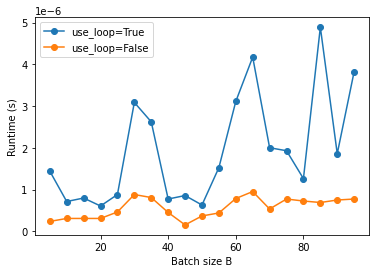

In [143]:
import time
import matplotlib.pyplot as plt
from pytorch101 import batched_matrix_multiply

N, M, P = 100, 100, 100
loop_times = []
no_loop_times = []
Bs = list(range(5, 100, 5))
num_trials = 20
for B in Bs:
    loop_trials = []
    no_loop_trials = []
    for trial in range(num_trials):
        x = torch.randn(B, N, M)
        y = torch.randn(B, M, P)
        t0 = time.time()
        z1 = batched_matrix_multiply(x, y, use_loop=True)
        t1 = time.time()
        z2 = batched_matrix_multiply(x, y, use_loop=False)
        t2 = time.time()
        loop_trials.append(t1 - t0)
        no_loop_trials.append(t2 - t1)
    loop_mean = torch.tensor(loop_trials).mean().item()
    no_loop_mean = torch.tensor(no_loop_trials).mean().item()
    loop_times.append(loop_mean)
    no_loop_times.append(no_loop_mean)
    
plt.plot(Bs, loop_times, 'o-', label='use_loop=True')
plt.plot(Bs, no_loop_times, 'o-', label='use_loop=False')
plt.xlabel('Batch size B')
plt.ylabel('Runtime (s)')
plt.legend()
plt.show()

**Read later:**


  100+ Tensor operations, including transposing, indexing, slicing,
  mathematical operations, linear algebra, random numbers, etc.,
  are described [here](https://pytorch.org/docs/torch).

## Tensor Indexing

We have already seen how to get and set individual elements of PyTorch tensors. PyTorch also provides many other ways of indexing into tensors. Getting comfortable with these different options makes it easy to modify different parts of tensors with ease.

### Slice Indexing

PyTorch also provides many other ways of indexing into tensors. All standard NumPy-like indexing can be applied to Tensors also.

In [98]:
print(x[:, 1])

tensor([ 0.7925,  0.8426, -1.2219,  1.0934, -1.2517])


In [99]:
x[:, 1].size()

torch.Size([5])

Similar to Python lists and numpy arrays, PyTorch tensors can be sliced using the syntax start:stop or start:stop:step. The stop index is always non-inclusive: it is the first element not to be included in the slice.

Start and stop indices can be negative, in which case they count backward from the end of the tensor.

In [103]:
a = torch.tensor([0, 11, 22, 33, 44, 55, 66])
print(0, a)        # (0) Original tensor
print(1, a[2:5])   # (1) Elements between index 2 and 5
print(2, a[2:])    # (2) Elements after index 2
print(3, a[:5])    # (3) Elements before index 5
print(4, a[:])     # (4) All elements
print(5, a[1:5:2]) # (5) Every second element between indices 1 and 5
print(6, a[:-1])   # (6) All but the last element
print(7, a[-4::2]) # (7) Every second element, starting from the fourth-last

0 tensor([ 0, 11, 22, 33, 44, 55, 66])
1 tensor([22, 33, 44])
2 tensor([22, 33, 44, 55, 66])
3 tensor([ 0, 11, 22, 33, 44])
4 tensor([ 0, 11, 22, 33, 44, 55, 66])
5 tensor([11, 33])
6 tensor([ 0, 11, 22, 33, 44, 55])
7 tensor([33, 55])


For multidimensional tensors, you can provide a slice or integer for each dimension of the tensor in order to extract different types of subtensors:

In [104]:
# Create the following rank 2 tensor with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = torch.tensor([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print('Original tensor:')
print(a)
print('shape: ', a.shape)

# Get row 1, and all columns. 
print('\nSingle row:')
print(a[1, :])
print(a[1])  # Gives the same result; we can omit : for trailing dimensions
print('shape: ', a[1].shape)

print('\nSingle column:')
print(a[:, 1])
print('shape: ', a[:, 1].shape)

# Get the first two rows and the last three columns
print('\nFirst two rows, last two columns:')
print(a[:2, -3:])
print('shape: ', a[:2, -3:].shape)

# Get every other row, and columns at index 1 and 2
print('\nEvery other row, middle columns:')
print(a[::2, 1:3])
print('shape: ', a[::2, 1:3].shape)

Original tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
shape:  torch.Size([3, 4])

Single row:
tensor([5, 6, 7, 8])
tensor([5, 6, 7, 8])
shape:  torch.Size([4])

Single column:
tensor([ 2,  6, 10])
shape:  torch.Size([3])

First two rows, last two columns:
tensor([[2, 3, 4],
        [6, 7, 8]])
shape:  torch.Size([2, 3])

Every other row, middle columns:
tensor([[ 2,  3],
        [10, 11]])
shape:  torch.Size([2, 2])


There are two common ways to access a single row or column of a tensor: using an integer will reduce the rank by one, and using a length-one slice will keep the same rank. Note that this is different behavior from MATLAB.

In [105]:
# Create the following rank 2 tensor with shape (3, 4)
a = torch.tensor([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print('Original tensor')
print(a)

row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print('\nTwo ways of accessing a single row:')
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)

# We can make the same distinction when accessing columns::
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print('\nTwo ways of accessing a single column:')
print(col_r1, col_r1.shape)
print(col_r2, col_r2.shape)

Original tensor
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Two ways of accessing a single row:
tensor([5, 6, 7, 8]) torch.Size([4])
tensor([[5, 6, 7, 8]]) torch.Size([1, 4])

Two ways of accessing a single column:
tensor([ 2,  6, 10]) torch.Size([3])
tensor([[ 2],
        [ 6],
        [10]]) torch.Size([3, 1])


Slicing a tensor returns a **view** into the same data, so modifying it will also modify the original tensor. To avoid this, you can use the `clone()` method to make a copy of a tensor.

In [106]:
# Create a tensor, a slice, and a clone of a slice
a = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])
b = a[0, 1:]
c = a[0, 1:].clone()
print('Before mutating:')
print(a)
print(b)
print(c)

a[0, 1] = 20  # a[0, 1] and b[0] point to the same element
b[1] = 30     # b[1] and a[0, 2] point to the same element
c[2] = 40     # c is a clone, so it has its own data
print('\nAfter mutating:')
print(a)
print(b)
print(c)

print(a.storage().data_ptr() == c.storage().data_ptr())

Before mutating:
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
tensor([2, 3, 4])
tensor([2, 3, 4])

After mutating:
tensor([[ 1, 20, 30,  4],
        [ 5,  6,  7,  8]])
tensor([20, 30,  4])
tensor([ 2,  3, 40])
False


### Integer tensor indexing

When you index into torch tensor using slicing, the resulting tensor view will always be a subarray of the original tensor. This is powerful, but can be restrictive.

We can also use **index arrays** to index tensors; this lets us construct new tensors with a lot more flexibility than using slices.

As an example, we can use index arrays to reorder the rows or columns of a tensor:

In [107]:
# Create the following rank 2 tensor with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('Original tensor:')
print(a)

# Create a new tensor of shape (5, 4) by reordering rows from a:
# - First two rows same as the first row of a
# - Third row is the same as the last row of a
# - Fourth and fifth rows are the same as the second row from a
idx = [0, 0, 2, 1, 1]  # index arrays can be Python lists of integers
print('\nReordered rows:')
print(a[idx])

# Create a new tensor of shape (3, 4) by reversing the columns from a
idx = torch.tensor([3, 2, 1, 0])  # Index arrays can be int64 torch tensors
print('\nReordered columns:')
print(a[:, idx])

Original tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Reordered rows:
tensor([[ 1,  2,  3,  4],
        [ 1,  2,  3,  4],
        [ 9, 10, 11, 12],
        [ 5,  6,  7,  8],
        [ 5,  6,  7,  8]])

Reordered columns:
tensor([[ 4,  3,  2,  1],
        [ 8,  7,  6,  5],
        [12, 11, 10,  9]])


More generally, given index arrays `idx0` and `idx1` with `N` elements each, `a[idx0, idx1]` is equivalent to:

```
torch.tensor([
  a[idx0[0], idx1[0]],
  a[idx0[1], idx1[1]],
  ...,
  a[idx0[N - 1], idx1[N - 1]]
])
```

(A similar pattern extends to tensors with more than two dimensions)

We can for example use this to get or set the diagonal of a tensor:

In [108]:
a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print('Original tensor:')
print(a)

idx = [0, 1, 2]
print('\nGet the diagonal:')
print(a[idx, idx])

# Modify the diagonal
a[idx, idx] = torch.tensor([11, 22, 33])
print('\nAfter setting the diagonal:')
print(a)

Original tensor:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Get the diagonal:
tensor([1, 5, 9])

After setting the diagonal:
tensor([[11,  2,  3],
        [ 4, 22,  6],
        [ 7,  8, 33]])


One useful trick with integer array indexing is selecting or mutating one element from each row or column of a matrix:

In [109]:
# Create a new tensor from which we will select elements
a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print('Original tensor:')
print(a)

# Take on element from each row of a:
# from row 0, take element 1;
# from row 1, take element 2;
# from row 2, take element 1;
# from row 3, take element 0
idx0 = torch.arange(a.shape[0])  # Quick way to build [0, 1, 2, 3]
idx1 = torch.tensor([1, 2, 1, 0])
print('\nSelect one element from each row:')
print(a[idx0, idx1])

# Now set each of those elements to zero
a[idx0, idx1] = 0
print('\nAfter modifying one element from each row:')
print(a)

Original tensor:
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

Select one element from each row:
tensor([ 2,  6,  8, 10])

After modifying one element from each row:
tensor([[ 1,  0,  3],
        [ 4,  5,  0],
        [ 7,  0,  9],
        [ 0, 11, 12]])


### Boolean tensor indexing

Boolean tensor indexing lets you pick out arbitrary elements of a tensor according to a boolean mask. Frequently this type of indexing is used to select or modify the elements of a tensor that satisfy some condition.

In PyTorch, we use tensors of dtype `torch.bool` to hold boolean masks.

(Prior to version 1.2.0, there was no `torch.bool` type so instead `torch.uint8` was usually used to represent boolean data, with 0 indicating false and 1 indicating true. Watch out for this in older PyTorch code!)

In [137]:
a = torch.tensor([[1,2], [3, 4], [5, 6]])
print('Original tensor:')
print(a)

# Find the elements of a that are bigger than 3. The mask has the same shape as
# a, where each element of mask tells whether the corresponding element of a
# is greater than three.
mask = (a > 3)
print('\nMask tensor:')
print(mask)

# We can use the mask to construct a rank-1 tensor containing the elements of a
# that are selected by the mask
print('\nSelecting elements with the mask:')
print(a[mask])

# We can also use boolean masks to modify tensors; for example this sets all
# elements <= 3 to zero:
a[a <= 3] = 0
print('\nAfter modifying with a mask:')
print(a)

Original tensor:
tensor([[1, 2],
        [3, 4],
        [5, 6]])

Mask tensor:
tensor([[False, False],
        [False,  True],
        [ True,  True]])

Selecting elements with the mask:
tensor([4, 5, 6])

After modifying with a mask:
tensor([[0, 0],
        [0, 4],
        [5, 6]])


## Reshaping Operations

### View

PyTorch provides many ways to manipulate the shapes of tensors. If you want to resize/reshape tensors, the simplest way to do is to use .view(): This returns a new tensor with the same number of elements as its input, but with a different shape.

We can use .view() to flatten matrices into vectors, and to convert rank-1 vectors into rank-2 row or column matrices:

In [110]:
x0 = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])
print('Original tensor:')
print(x0)
print('shape:', x0.shape)

# Flatten x0 into a rank 1 vector of shape (8,)
x1 = x0.view(8)
print('\nFlattened tensor:')
print(x1)
print('shape:', x1.shape)

# Convert x1 to a rank 2 "row vector" of shape (1, 8)
x2 = x1.view(1, 8)
print('\nRow vector:')
print(x2)
print('shape:', x2.shape)

# Convert x1 to a rank 2 "column vector" of shape (8, 1)
x3 = x1.view(8, 1)
print('\nColumn vector:')
print(x3)
print('shape:', x3.shape)

# Convert x1 to a rank 3 tensor of shape (2, 2, 2):
x4 = x1.view(2, 2, 2)
print('\nRank 3 tensor:')
print(x4)
print('shape:', x4.shape)

Original tensor:
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
shape: torch.Size([2, 4])

Flattened tensor:
tensor([1, 2, 3, 4, 5, 6, 7, 8])
shape: torch.Size([8])

Row vector:
tensor([[1, 2, 3, 4, 5, 6, 7, 8]])
shape: torch.Size([1, 8])

Column vector:
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]])
shape: torch.Size([8, 1])

Rank 3 tensor:
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
shape: torch.Size([2, 2, 2])


As a convenience, calls to .view() may include a single -1 argument; this puts enough elements on that dimension so that the output has the same shape as the input. This makes it easy to write some reshape operations in a way that is agnostic to the shape of the tensor:

In [102]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())
print(x)
print(y)
print(z)

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])
tensor([[ 0.6058,  0.9531, -0.3294,  1.1420],
        [ 0.3854, -1.0247,  1.0204, -0.3268],
        [-0.1154,  1.0860,  0.7936, -0.6699],
        [-0.4846,  0.6365, -0.1710,  1.1756]])
tensor([ 0.6058,  0.9531, -0.3294,  1.1420,  0.3854, -1.0247,  1.0204, -0.3268,
        -0.1154,  1.0860,  0.7936, -0.6699, -0.4846,  0.6365, -0.1710,  1.1756])
tensor([[ 0.6058,  0.9531, -0.3294,  1.1420,  0.3854, -1.0247,  1.0204, -0.3268],
        [-0.1154,  1.0860,  0.7936, -0.6699, -0.4846,  0.6365, -0.1710,  1.1756]])


In [179]:
n = [6, 9, 12]
for k in n:
    a = torch.tensor([i for i in range(k)])
    a_col = a.view(-1,3)
    print("Original tensor:", a)
    print("Reshaped view of tensor with 3 columns:\n",a_col)

Original tensor: tensor([0, 1, 2, 3, 4, 5])
Reshaped view of tensor with 3 columns:
 tensor([[0, 1, 2],
        [3, 4, 5]])
Original tensor: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])
Reshaped view of tensor with 3 columns:
 tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
Original tensor: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Reshaped view of tensor with 3 columns:
 tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


#### Squeeze/Unsqueeze

#### Unsqueeze

torch.unsqueeze(input, dim) → Tensor

Returns a new tensor with a dimension of size one inserted at the specified position. The returned tensor shares the same underlying data with this tensor.

A dim value within the range [-input.dim() - 1, input.dim() + 1) can be used. Negative dim will correspond to unsqueeze() applied at dim = dim + input.dim() + 1.

In [190]:
x = torch.tensor([1, 2, 3, 4])
print("Original tensor:", x)
print("Shape:", x.shape)
print('\n')
x1 = torch.unsqueeze(x, 0)
print("Tensor after Unsqueeze along axis=0:")
print(x1)
print("Shape: ", x1.shape)

#x2 = tensor([[ 1,  2,  3,  4]])
x2 = torch.unsqueeze(x, 1)
print('\n')
print("Tensor after Unsqueeze along axis=1:")
print(x2)
print("Shape:", x2.shape)

Original tensor: tensor([1, 2, 3, 4])
Shape: torch.Size([4])


Tensor after Unsqueeze along axis=0:
tensor([[1, 2, 3, 4]])
Shape:  torch.Size([1, 4])


Tensor after Unsqueeze along axis=1:
tensor([[1],
        [2],
        [3],
        [4]])
Shape: torch.Size([4, 1])


#### Squeeze

torch.squeeze(input, dim=None, *, out=None) → Tensor

Returns a tensor with all the dimensions of input of size 1 removed.

For example, if input is of shape: (A×1×B×C×1×D) then the out tensor will be of shape: (A×B×C×D).

When dim is given, a squeeze operation is done only in the given dimension. If input is of shape: (A×1×B), squeeze(input, 0) leaves the tensor unchanged, but squeeze(input, 1) will squeeze the tensor to the shape (A×B).

In [191]:
x = torch.zeros(2, 1, 2, 1, 2)
print(x.size())
#torch.Size([2, 1, 2, 1, 2])

y = torch.squeeze(x)
print(y.size())
#torch.Size([2, 2, 2])

y = torch.squeeze(x, 0)
print(y.size())
#torch.Size([2, 1, 2, 1, 2])

y = torch.squeeze(x, 1)
print(y.size())

torch.Size([2, 1, 2, 1, 2])
torch.Size([2, 2, 2])
torch.Size([2, 1, 2, 1, 2])
torch.Size([2, 2, 1, 2])


In [111]:
# We can reuse these functions for tensors of different shapes
def flatten(x):
    return x.view(-1)

def make_row_vec(x):
    return x.view(1, -1)

x0 = torch.tensor([[1, 2, 3], [4, 5, 6]])
x0_flat = flatten(x0)
x0_row = make_row_vec(x0)
print('x0:')
print(x0)
print('x0_flat:')
print(x0_flat)
print('x0_row:')
print(x0_row)

x1 = torch.tensor([[1, 2], [3, 4]])
x1_flat = flatten(x1)
x1_row = make_row_vec(x1)
print('\nx1:')
print(x1)
print('x1_flat:')
print(x1_flat)
print('x1_row:')
print(x1_row)

x0:
tensor([[1, 2, 3],
        [4, 5, 6]])
x0_flat:
tensor([1, 2, 3, 4, 5, 6])
x0_row:
tensor([[1, 2, 3, 4, 5, 6]])

x1:
tensor([[1, 2],
        [3, 4]])
x1_flat:
tensor([1, 2, 3, 4])
x1_row:
tensor([[1, 2, 3, 4]])


As its name implies, a tensor returned by `.view()` shares the same data as the input, so changes to one will affect the other and vice-versa:

In [112]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
x_flat = x.view(-1)
print('x before modifying:')
print(x)
print('x_flat before modifying:')
print(x_flat)

x[0, 0] = 10   # x[0, 0] and x_flat[0] point to the same data
x_flat[1] = 20 # x_flat[1] and x[0, 1] point to the same data

print('\nx after modifying:')
print(x)
print('x_flat after modifying:')
print(x_flat)

x before modifying:
tensor([[1, 2, 3],
        [4, 5, 6]])
x_flat before modifying:
tensor([1, 2, 3, 4, 5, 6])

x after modifying:
tensor([[10, 20,  3],
        [ 4,  5,  6]])
x_flat after modifying:
tensor([10, 20,  3,  4,  5,  6])


### Swapping axes

Another common reshape operation you might want to perform is transposing a matrix. You might be surprised if you try to transpose a matrix with `.view()`: The `view()` function takes elements in row-major order, so **you cannot transpose matrices with `.view()`**.

In general, you should only use `.view()` to add new dimensions to a tensor, or to collapse adjacent dimensions of a tensor.

For other types of reshape operations, you usually need to use a function that can swap axes of a tensor. The simplest such function is .t(), specificially for transposing matrices. It is available both as a [function in the `torch` module](https://pytorch.org/docs/stable/generated/torch.t.html#torch.t), and as a [tensor instance method](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.t):

In [113]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print('Original matrix:')
print(x)
print('\nTransposing with view DOES NOT WORK!')
print(x.view(3, 2))
print('\nTransposed matrix:')
print(torch.t(x))
print(x.t())

Original matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Transposing with view DOES NOT WORK!
tensor([[1, 2],
        [3, 4],
        [5, 6]])

Transposed matrix:
tensor([[1, 4],
        [2, 5],
        [3, 6]])
tensor([[1, 4],
        [2, 5],
        [3, 6]])


For tensors with more than two dimensions, we can use the function [`torch.transpose`](https://pytorch.org/docs/stable/generated/torch.transpose.html#torch.transpose) to swap arbitrary dimensions, or the [`.permute`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.permute) method to arbitrarily permute dimensions:

In [114]:
# Create a tensor of shape (2, 3, 4)
x0 = torch.tensor([
     [[1,  2,  3,  4],
      [5,  6,  7,  8],
      [9, 10, 11, 12]],
     [[13, 14, 15, 16],
      [17, 18, 19, 20],
      [21, 22, 23, 24]]])
print('Original tensor:')
print(x0)
print('shape:', x0.shape)

# Swap axes 1 and 2; shape is (2, 4, 3)
x1 = x0.transpose(1, 2)
print('\nSwap axes 1 and 2:')
print(x1)
print(x1.shape)

# Permute axes; the argument (1, 2, 0) means:
# - Make the old dimension 1 appear at dimension 0;
# - Make the old dimension 2 appear at dimension 1;
# - Make the old dimension 0 appear at dimension 2
# This results in a tensor of shape (3, 4, 2)
x2 = x0.permute(1, 2, 0)
print('\nPermute axes')
print(x2)
print('shape:', x2.shape)

Original tensor:
tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],

        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]])
shape: torch.Size([2, 3, 4])

Swap axes 1 and 2:
tensor([[[ 1,  5,  9],
         [ 2,  6, 10],
         [ 3,  7, 11],
         [ 4,  8, 12]],

        [[13, 17, 21],
         [14, 18, 22],
         [15, 19, 23],
         [16, 20, 24]]])
torch.Size([2, 4, 3])

Permute axes
tensor([[[ 1, 13],
         [ 2, 14],
         [ 3, 15],
         [ 4, 16]],

        [[ 5, 17],
         [ 6, 18],
         [ 7, 19],
         [ 8, 20]],

        [[ 9, 21],
         [10, 22],
         [11, 23],
         [12, 24]]])
shape: torch.Size([3, 4, 2])


### Contiguous tensors

Some combinations of reshaping operations will fail with cryptic errors. The exact reasons for this have to do with the way that tensors and views of tensors are implemented, and are beyond the scope of this assignment. However if you're curious, [this blog post by Edward Yang](http://blog.ezyang.com/2019/05/pytorch-internals/) gives a clear explanation of the problem.

What you need to know is that you can typically overcome these sorts of errors by either by calling [`.contiguous()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.contiguous) before `.view()`, or by using [`.reshape()`](https://pytorch.org/docs/stable/generated/torch.reshape.html#torch.reshape) instead of `.view()`.

In [115]:
x0 = torch.randn(2, 3, 4)

try:
  # This sequence of reshape operations will crash
  x1 = x0.transpose(1, 2).view(8, 3)
except RuntimeError as e:
  print(type(e), e)
  
# We can solve the problem using either .contiguous() or .reshape()
x1 = x0.transpose(1, 2).contiguous().view(8, 3)
x2 = x0.transpose(1, 2).reshape(8, 3)
print('x1 shape: ', x1.shape)
print('x2 shape: ', x2.shape)

<class 'RuntimeError'> view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.
x1 shape:  torch.Size([8, 3])
x2 shape:  torch.Size([8, 3])


Now we will apply resize operation oon tensors following different approaches:

In [196]:
x = torch.tensor([[1,2,3],
                 [4,5,6]])
print(x.shape)
print(x)
# torch.Size([2, 3])

torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])


Approach 1: add dimension with None

Use NumPy-style insertion of None (aka np.newaxis) to add dimensions anywhere you want. See here.

In [198]:
y = x[None, :, None, :] # Add new dimensions at positions 0 and 2.
print(y.shape)
# torch.Size([1, 2, 1, 3])

torch.Size([1, 2, 1, 3])


Approach 2: unsqueeze

Use torch.Tensor.unsqueeze(i) (a.k.a. torch.unsqueeze(tensor, i) or the in-place version unsqueeze_()) to add a new dimension at the i'th dimension. The returned tensor shares the same data as the original tensor. In this example, we can use unqueeze() twice to add the two new dimensions.

In [199]:
# Use unsqueeze twice.
y = x.unsqueeze(0) # Add new dimension at position 0
print(y.shape)
# torch.Size([1, 2, 3])

y = y.unsqueeze(2) # Add new dimension at position 2
print(y.shape)
# torch.Size([1, 2, 1, 3])

torch.Size([1, 2, 3])
torch.Size([1, 2, 1, 3])


Approach 3: view

Use torch.Tensor.view(*shape) to specify all the dimensions. The returned tensor shares the same data as the original tensor.

In [200]:
y = x.view(1, 2, 1, 3)
print(y.shape)

torch.Size([1, 2, 1, 3])


Approach 4: reshape

Use torch.Tensor.reshape(*shape) (aka torch.reshape(tensor, shapetuple)) to specify all the dimensions. If the original data is contiguous and has the same stride, the returned tensor will be a view of input (sharing the same data), otherwise it will be a copy. This function is similar to the NumPy reshape() function in that it lets you define all the dimensions and can return either a view or a copy.

In [201]:
y = x.reshape(1, 2, 1, 3)
print(y.shape)
# torch.Size([1, 2, 1, 3])

torch.Size([1, 2, 1, 3])


Approach 5: resize_

Use the in-place function torch.Tensor.resize_(*sizes) to modify the original tensor. The documentation states:

WARNING. This is a low-level method. The storage is reinterpreted as C-contiguous, ignoring the current strides (unless the target size equals the current size, in which case the tensor is left unchanged). For most purposes, you will instead want to use view(), which checks for contiguity, or reshape(), which copies data if needed. To change the size in-place with custom strides, see set_().

In [202]:
x.resize_(1, 2, 1, 3)
print(x.shape)
# torch.Size([1, 2, 1, 3])

torch.Size([1, 2, 1, 3])


If you have a one element tensor, use ``.item()`` to get the value as a
Python number



In [ ]:
x = torch.randn(1)
print(x)
print(x.item())

### Matrix operations

Note that unlike MATLAB, * is elementwise multiplication, not matrix multiplication. PyTorch provides a number of linear algebra functions that compute different types of vector and matrix products. The most commonly used are:

- [`torch.dot`](https://pytorch.org/docs/stable/generated/torch.dot.html#torch.dot): Computes inner product of vectors
- [`torch.mm`](https://pytorch.org/docs/stable/generated/torch.mm.html#torch.mm): Computes matrix-matrix products
- [`torch.mv`](https://pytorch.org/docs/stable/generated/torch.mv.html#torch.mv): Computes matrix-vector products
- [`torch.addmm`](https://pytorch.org/docs/stable/generated/torch.addmm.html#torch.addmm) / [`torch.addmv`](https://pytorch.org/docs/stable/generated/torch.addmv.html#torch.addmv): Computes matrix-matrix and matrix-vector multiplications plus a bias
- [`torch.bmm`](https://pytorch.org/docs/stable/generated/torch.bmm.html#torch.bmm) / [`torch.baddmm`](https://pytorch.org/docs/stable/generated/torch.baddbmm.html#torch.baddbmm): Batched versions of `torch.mm` and `torch.addmm`, respectively
- [`torch.matmul`](https://pytorch.org/docs/stable/generated/torch.matmul.html#torch.matmul): General matrix product that performs different operations depending on the rank of the inputs. Confusingly, this is similar to `np.dot` in numpy.

You can find a full list of the available linear algebra operators [in the documentation](https://pytorch.org/docs/stable/torch.html#blas-and-lapack-operations).

Here is an example of using `torch.dot` to compute inner products. Like the other mathematical operators we've seen, most linear algebra operators are available both as functions in the `torch` module and as instance methods of tensors:

In [121]:
v = torch.tensor([9,10], dtype=torch.float32)
w = torch.tensor([11, 12], dtype=torch.float32)

# Inner product of vectors
print('Dot products:')
print(torch.dot(v, w))
print(v.dot(w))

# dot only works for vectors -- it will give an error for tensors of rank > 1
x = torch.tensor([[1,2],[3,4]], dtype=torch.float32)
y = torch.tensor([[5,6],[7,8]], dtype=torch.float32)
try:
  print(x.dot(y))
except RuntimeError as e:
  print(e)
  
# Instead we use mm for matrix-matrix products:
print('\nMatrix-matrix product:')
print(torch.mm(x, y))
print(x.mm(y))

Dot products:
tensor(219.)
tensor(219.)
1D tensors expected, got 2D, 2D tensors at /Users/distiller/project/conda/conda-bld/pytorch_1595629430416/work/aten/src/TH/generic/THTensorEvenMoreMath.cpp:83

Matrix-matrix product:
tensor([[19., 22.],
        [43., 50.]])
tensor([[19., 22.],
        [43., 50.]])


With all the different linear algebra operators that PyTorch provides, there is usually more than one way to compute something. For example to compute matrix-vector products we can use `torch.mv`; we can reshape the vector to have rank 2 and use `torch.mm`; or we can use `torch.matmul`. All give the same results, but the outputs might have different ranks:

In [122]:
print('Here is x (rank 2):')
print(x)
print('\nHere is v (rank 1):')
print(v)

# Matrix-vector multiply with torch.mv produces a rank-1 output
print('\nMatrix-vector product with torch.mv (rank 1 output)')
print(torch.mv(x, v))
print(x.mv(v))

# We can reshape the vector to have rank 2 and use torch.mm to perform
# matrix-vector products, but the result will have rank 2
print('\nMatrix-vector product with torch.mm (rank 2 output)')
print(torch.mm(x, v.view(2, 1)))
print(x.mm(v.view(2, 1)))

print('\nMatrix-vector product with torch.matmul (rank 1 output)')
print(torch.matmul(x, v))
print(x.matmul(v))

Here is x (rank 2):
tensor([[1., 2.],
        [3., 4.]])

Here is v (rank 1):
tensor([ 9., 10.])

Matrix-vector product with torch.mv (rank 1 output)
tensor([29., 67.])
tensor([29., 67.])

Matrix-vector product with torch.mm (rank 2 output)
tensor([[29.],
        [67.]])
tensor([[29.],
        [67.]])

Matrix-vector product with torch.matmul (rank 1 output)
tensor([29., 67.])
tensor([29., 67.])


### Vectorization
In many cases, avoiding explicit Python loops in your code and instead using PyTorch operators to handle looping internally will cause your code to run a lot faster. This style of writing code, called **vectorization**, avoids overhead from the Python interpreter, and can also better parallelize the computation (e.g. across CPU cores, on on GPUs). Whenever possible you should strive to write vectorized code.

Run the following the compare the speed of the `batched_matrix_multiply` with `use_loop=True` and with `use_loop=False`.

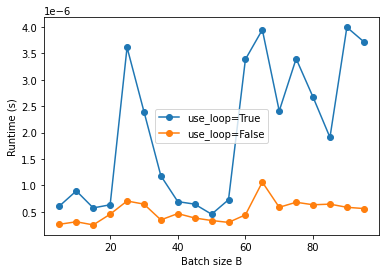

In [123]:
import time
import matplotlib.pyplot as plt
from pytorch101 import batched_matrix_multiply

N, M, P = 100, 100, 100
loop_times = []
no_loop_times = []
Bs = list(range(5, 100, 5))
num_trials = 20
for B in Bs:
    loop_trials = []
    no_loop_trials = []
    for trial in range(num_trials):
        x = torch.randn(B, N, M)
        y = torch.randn(B, M, P)
        t0 = time.time()
        z1 = batched_matrix_multiply(x, y, use_loop=True)
        t1 = time.time()
        z2 = batched_matrix_multiply(x, y, use_loop=False)
        t2 = time.time()
        loop_trials.append(t1 - t0)
        no_loop_trials.append(t2 - t1)
    loop_mean = torch.tensor(loop_trials).mean().item()
    no_loop_mean = torch.tensor(no_loop_trials).mean().item()
    loop_times.append(loop_mean)
    no_loop_times.append(no_loop_mean)
    
plt.plot(Bs, loop_times, 'o-', label='use_loop=True')
plt.plot(Bs, no_loop_times, 'o-', label='use_loop=False')
plt.xlabel('Batch size B')
plt.ylabel('Runtime (s)')
plt.legend()
plt.show()

## Broadcasting

Broadcasting is a powerful mechanism that allows PyTorch to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller tensor and a larger tensor, and we want to use the smaller tensor multiple times to perform some operation on the larger tensor.

For example, suppose that we want to add a constant vector to each row of a tensor. We could do it like this:


In [124]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])
y = torch.zeros_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


This works; however when the tensor x is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the tensor x is equivalent to forming a tensor vv by stacking multiple copies of v vertically, then performing elementwise summation of x and vv. We could implement this approach like this:


In [125]:
vv = v.repeat((4, 1))  # Stack 4 copies of v on top of each other
print(vv)              # Prints "[[1 0 1]
                       #          [1 0 1]
                       #          [1 0 1]
                       #          [1 0 1]]"

tensor([[1, 0, 1],
        [1, 0, 1],
        [1, 0, 1],
        [1, 0, 1]])


In [126]:
y = x + vv  # Add x and vv elementwise
print(y)

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


PyTorch broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [127]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


The line y = x + v works even though x has shape (4, 3) and v has shape (3,) due to broadcasting; this line works as if v actually had shape (4, 3), where each row was a copy of v, and the sum was performed elementwise.

Broadcasting two tensors together follows these rules:

1.   If the tensors do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2.   The two tensors are said to be *compatible* in a dimension if they have the same size in the dimension, or if one of the tensors has size 1 in that dimension.
3.   The tensors can be broadcast together if they are compatible in all dimensions.
4.   After broadcasting, each tensor behaves as if it had shape equal to the elementwise maximum of shapes of the two input tensors.
5.   In any dimension where one tensor had size 1 and the other tensor had size greater than 1, the first tensor behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](https://pytorch.org/docs/stable/notes/broadcasting.html).

Broadcasting usually happens implicitly inside many PyTorch operators. However we can also broadcast explicitly using the function [`torch.broadcast_tensors`](https://pytorch.org/docs/stable/generated/torch.broadcast_tensors.html#torch.broadcast_tensors):

In [128]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])
print('Here is x (before broadcasting):')
print(x)
print('x.shape: ', x.shape)
print('\nHere is v (before broadcasting):')
print(v)
print('v.shape: ', v.shape)

xx, vv = torch.broadcast_tensors(x, v)
print('Here is xx (after) broadcasting):')
print(xx)
print('xx.shape: ', x.shape)
print('\nHere is vv (after broadcasting):')
print(vv)
print('vv.shape: ', vv.shape)

Here is x (before broadcasting):
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
x.shape:  torch.Size([4, 3])

Here is v (before broadcasting):
tensor([1, 0, 1])
v.shape:  torch.Size([3])
Here is xx (after) broadcasting):
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
xx.shape:  torch.Size([4, 3])

Here is vv (after broadcasting):
tensor([[1, 0, 1],
        [1, 0, 1],
        [1, 0, 1],
        [1, 0, 1]])
vv.shape:  torch.Size([4, 3])


Notice that after broadcasting, `x` remains the same but `v` has an extra dimension prepended to its shape, and it is duplicated to have the same shape as `x`; since they have the same shape after broadcasting they can be added elementwise.

Not all functions support broadcasting. You can find functions that does not support broadcasting from the official docs. (e.g. [`torch.mm`](https://pytorch.org/docs/stable/torch.html#torch.mm) does not support broadcasting, but [`torch.matmul`](https://pytorch.org/docs/1.1.0/torch.html#torch.matmul) does)

Broadcasting can let us easily implement many different operations. For example we can compute an outer product of vectors:

In [129]:
# Compute outer product of vectors
v = torch.tensor([1, 2, 3])  # v has shape (3,)
w = torch.tensor([4, 5])     # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
print(v.view(3, 1) * w)

tensor([[ 4,  5],
        [ 8, 10],
        [12, 15]])


We can add a vector to each row of a matrix:

In [130]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3)
v = torch.tensor([1, 2, 3])               # v has shape (3,)
print('Here is the matrix:')
print(x)
print('\nHere is the vector:')
print(v)

# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
print('\nAdd the vector to each row of the matrix:')
print(x + v)

Here is the matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Here is the vector:
tensor([1, 2, 3])

Add the vector to each row of the matrix:
tensor([[2, 4, 6],
        [5, 7, 9]])


We can add a vector to each column of a matrix:

In [131]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3)
w = torch.tensor([4, 5])                  # w has shape (2,)
print('Here is the matrix:')
print(x)
print('\nHere is the vector:')
print(w)

# x has shape (2, 3) and w has shape (2,). We reshape w to (2, 1);
# then when we add the two the result broadcasts to (2, 3):
print('\nAdd the vector to each column of the matrix:')
print(x + w.view(-1, 1))

# Another solution is the following:
# 1. Transpose x so it has shape (3, 2)
# 2. Since w has shape (2,), adding will broadcast to (3, 2)
# 3. Transpose the result, resulting in a shape (2, 3)
print((x.t() + w).t())

Here is the matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Here is the vector:
tensor([4, 5])

Add the vector to each column of the matrix:
tensor([[ 5,  6,  7],
        [ 9, 10, 11]])
tensor([[ 5,  6,  7],
        [ 9, 10, 11]])


Multiply a tensor by a set of constants:

In [132]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3)
c = torch.tensor([1, 10, 11, 100])        # c has shape (4)
print('Here is the matrix:')
print(x)
print('\nHere is the vector:')
print(c)

# We do the following:
# 1. Reshape c from (4,) to (4, 1, 1)
# 2. x has shape (2, 3). Since they have different ranks, when we multiply the
#    two, x behaves as if its shape were (1, 2, 3)
# 3. The result of the broadcast multiplication between tensor of shape
#    (4, 1, 1) and (1, 2, 3) has shape (4, 2, 3)
# 4. The result y has shape (4, 2, 3), and y[i] (shape (2, 3)) is equal to
#    c[i] * x
y = c.view(-1, 1, 1) * x
print('\nMultiply x by a set of constants:')
print(y)

Here is the matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Here is the vector:
tensor([  1,  10,  11, 100])

Multiply x by a set of constants:
tensor([[[  1,   2,   3],
         [  4,   5,   6]],

        [[ 10,  20,  30],
         [ 40,  50,  60]],

        [[ 11,  22,  33],
         [ 44,  55,  66]],

        [[100, 200, 300],
         [400, 500, 600]]])


### Out-of-place vs in-place operators
Most PyTorch operators are classified into one of two categories:
- **Out-of-place operators:** return a new tensor. Most PyTorch operators behave this way.
- **In-place operators:** modify and return the input tensor. Instance methods that end with an underscore (such as `add_()` are in-place. Operators in the `torch` namespace can be made in-place using the `out=` keyword argument.

For example:

In [133]:
# Out-of-place addition creates and returns a new tensor without modifying the inputs:
x = torch.tensor([1, 2, 3])
y = torch.tensor([3, 4, 5])
print('Out-of-place addition:')
print('Before addition:')
print('x: ', x)
print('y: ', y)
z = x.add(y)  # Same as z = x + y or z = torch.add(x, y)
print('\nAfter addition (x and y unchanged):')
print('x: ', x)
print('y: ', y)
print('z: ', z)
print('z is x: ', z is x)
print('z is y: ', z is y)

# In-place addition modifies the input tensor:
print('\n\nIn-place Addition:')
print('Before addition:')
print('x: ', x)
print('y: ', y)
x.add_(y)  # Same as x += y or torch.add(x, y, out=x)
print('\nAfter addition (x is modified):')
print('x: ', x)
print('y: ', y)
print('z: ', z)
print('z is x: ', z is x)
print('z is y: ', z is y)

Out-of-place addition:
Before addition:
x:  tensor([1, 2, 3])
y:  tensor([3, 4, 5])

After addition (x and y unchanged):
x:  tensor([1, 2, 3])
y:  tensor([3, 4, 5])
z:  tensor([4, 6, 8])
z is x:  False
z is y:  False


In-place Addition:
Before addition:
x:  tensor([1, 2, 3])
y:  tensor([3, 4, 5])

After addition (x is modified):
x:  tensor([4, 6, 8])
y:  tensor([3, 4, 5])
z:  tensor([4, 6, 8])
z is x:  False
z is y:  False


In general, **you should avoid in-place operations** since they can cause problems when computing gradients using autograd (which we will cover in a future assignment).

## Running on GPU

One of the most important features of PyTorch is that it can use graphics processing units (GPUs) to accelerate its tensor operations.

We can easily check whether PyTorch is configured to use GPUs:

Tensors can be moved onto any device using the .to method.

In [134]:
import torch

if torch.cuda.is_available:
  print('PyTorch can use GPUs!')
else:
  print('PyTorch cannot use GPUs.')

PyTorch can use GPUs!


You can enable GPUs in Colab via Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU.

This may cause the Colab runtime to restart, so we will re-import torch in the next cell.

We have already seen that PyTorch tensors have a `dtype` attribute specifying their datatype. All PyTorch tensors also have a `device` attribute that specifies the device where the tensor is stored -- either CPU, or CUDA (for NVIDA GPUs). A tensor on a CUDA device will automatically use that device to accelerate all of its operations.

Just as with datatypes, we can use the [`.to()`](https://pytorch.org/docs/1.1.0/tensors.html#torch.Tensor.to) method to change the device of a tensor. We can also use the convenience methods `.cuda()` and `.cpu()` methods to move tensors between CPU and GPU. 

In [135]:
# Construct a tensor on the CPU
x0 = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print('x0 device:', x0.device)

# Move it to the GPU using .to()
x1 = x0.to('cuda')
print('x1 device:', x1.device)

# Move it to the GPU using .cuda()
x2 = x0.cuda()
print('x2 device:', x2.device)

# Move it back to the CPU using .to()
x3 = x1.to('cpu')
print('x3 device:', x3.device)

# Move it back to the CPU using .cpu()
x4 = x2.cpu()
print('x4 device:', x4.device)

# We can construct tensors directly on the GPU as well
y = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float64, device='cuda')
print('y device / dtype:', y.device, y.dtype)

# Calling x.to(y) where y is a tensor will return a copy of x with the same
# device and dtype as y
x5 = x0.to(y)
print('x5 device / dtype:', x5.device, x5.dtype)

x0 device: cpu


AssertionError: Torch not compiled with CUDA enabled

Performing large tensor operations on a GPU can be **a lot faster** than running the equivalent operation on CPU.

Here we compare the speed of adding two tensors of shape (10000, 10000) on CPU and GPU:

(Note that GPU code may run asynchronously with CPU code, so when timing the speed of operations on the GPU it is important to use `torch.cuda.synchronize` to synchronize the CPU and GPU.)

In [136]:
import time

a_cpu = torch.randn(10000, 10000, dtype=torch.float32)
b_cpu = torch.randn(10000, 10000, dtype=torch.float32)

a_gpu = a_cpu.cuda()
b_gpu = b_cpu.cuda()
torch.cuda.synchronize()

t0 = time.time()
c_cpu = a_cpu + b_cpu
t1 = time.time()
c_gpu = a_gpu + b_gpu
torch.cuda.synchronize()
t2 = time.time()

# Check that they computed the same thing
diff = (c_gpu.cpu() - c_cpu).abs().max().item()
print('Max difference between c_gpu and c_cpu:', diff)

cpu_time = 1000.0 * (t1 - t0)
gpu_time = 1000.0 * (t2 - t1)
print('CPU time: %.2f ms' % cpu_time)
print('GPU time: %.2f ms' % gpu_time)
print('GPU speedup: %.2f x' % (cpu_time / gpu_time))

AssertionError: Torch not compiled with CUDA enabled

You should see that running the same computation on the GPU was more than 10~30 times faster than on the CPU! Due to the massive speedups that GPUs offer, we will use GPUs to accelerate much of our machine learning code starting in Assignment 2.

CUDA Tensors
------------

Tensors can be moved onto any device using the ``.to`` method.

In [157]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

## NumPy Bridge


Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will share their underlying memory
locations (if the Torch Tensor is on CPU), and changing one will change
the other.

### Converting a Torch Tensor to a NumPy Array

In [152]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [175]:
b = a.numpy()
print(b)
type(b)

[0 1 2 3 4]


numpy.ndarray

See how the numpy array changed in value.



In [154]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


### Converting NumPy Array to Torch Tensor

See how changing the np array changed the Torch Tensor automatically

In [208]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)
print(type(a))
type(a)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
<class 'numpy.ndarray'>


numpy.ndarray

All the Tensors on the CPU except a CharTensor support converting to
NumPy and back.

### Conversion from a Pandas series¶

In [169]:
import pandas as pd
pd_series = pd.Series([i for i in range(1,6)])

In [170]:
pd_series

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [171]:
pd_to_torch = torch.from_numpy(pd_series.values)

In [172]:
pd_to_torch

tensor([1, 2, 3, 4, 5])

Use torch.as_tensor instead of torch.tensor

torch.as_tensor can be used to convert pd.Series or pd.DataFrame into tensor.

If you’re not already aware creating a tensor with torch.tensor() will always do a copy. torch.as_tensor allows one to create a new Tensor without necessarily performing a copy.

In [176]:
pd_to_torch_1 = torch.as_tensor(pd_series.values)

In [177]:
pd_to_torch_1

tensor([1, 2, 3, 4, 5])

Converting abck to a list

In [173]:
to_list = pd_to_torch.tolist()

In [174]:
to_list

[1, 2, 3, 4, 5]

Conversion from tuple - It is similar to conversion from list

In [204]:
thistuple = (1, 2, 3, 4, 5)
pd_to_tuple = torch.tensor(thistuple)

pd_to_tuple

tensor([1, 2, 3, 4, 5])